In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\jimco\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# from keras.optimizers import SGD


Using TensorFlow backend.


In [4]:
# fix random seed for reproducibility
seed=231
np.random.seed(231)


## Read the Dataset

##### White wine source data set

In [16]:
# white_datafile = os.path.join("..", "data", "sourcedata", "winequality-white.csv")
# print(white_datafile)

# white_df = pd.read_csv(white_datafile, delimiter=";")
# white_df.sort_values(by=['pH'], ascending=True)

##### Red wine source data set

In [5]:
datafile = os.path.join("..", "data", "sourcedata", "winequality-red.csv")
print(datafile)

red_df = pd.read_csv(datafile, delimiter=";")
red_df.head()
red_df.sort_values(by=['quality'], ascending=False)

..\data\sourcedata\winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


In [10]:
#pwd

## Select Features and Split the Data

In [11]:
wine_df = red_df

##### Set the target attribute (y axis)

In [12]:
y = wine_df["quality"].values.reshape(-1,1)
y
# Using SVM as a regression and NOT a clasifier so we won;t be declaring target class names 
# target_names = ["negative", "positive"]

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

###### drop the target (quality) column from data to have dataeframe of just the attributes we are regressing

In [13]:
X = wine_df.drop("quality", axis=1)
feature_names = X.columns
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


###### split the training and testing data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42345)

#### Scale the data

In [10]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [24]:
from sklearn.preprocessing import PowerTransformer
X_scaler = PowerTransformer(method='yeo-johnson').fit(X_train)
y_scaler = PowerTransformer(method='yeo-johnson').fit(y_train)

C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [12]:
# from sklearn.preprocessing import QuantileTransformer
# X_scaler = QuantileTransformer(output_distribution='normal').fit(X_train)
# y_scaler = QuantileTransformer(output_distribution='normal').fit(y_train)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
# y_scaler = MinMaxScaler(feature_range=(0, 1)).fit(y_train)

In [14]:
# from sklearn.preprocessing import MaxAbsScaler
# X_scaler = MaxAbsScaler().fit(X_train)
# y_scaler = MaxAbsScaler().fit(y_train)

In [15]:
# from sklearn.preprocessing import RobustScaler
# X_scaler = RobustScaler(quantile_range=(25, 75)).fit(X_train)
# y_scaler = RobustScaler(quantile_range=(25, 75)).fit(y_train)

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

### One-hot encode the labels

Step 1: Label-encode data set

In [16]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y_test = label_encoder.transform(y_test)
# encoded_y_train = label_encoder.transform(y_train)


In [17]:
# # print out the encoding for y_test just to see.
# for label, original_class in zip(encoded_y_test, y_test):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [15]:
# for label, original_class in zip(encoded_y_train, y_train):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

step 2 - One hot encode the label encoded data  

In [18]:
# One-hot encoding label encoded data
from tensorflow.keras.utils import to_categorical

# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)
# y_train_categorical[:7]

In [19]:
# encoded_y_train[:7]

In [20]:
# y_test_categorical[:7]

In [21]:
# encoded_y_test[:7]

# Train the Model



In [20]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.constraints import maxnorm
# from keras.optimizers import SGD

In [21]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
### first Model: 
# model = Sequential()

# number_inputs = 39
# number_hidden_nodes = 100
# number_classes = 3

# model.add(Dense(units=number_hidden_nodes,
#                 activation='relu', input_dim=number_inputs))
# model.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
# Create Model Function to create, compile and return a Keras NN model
#model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

def create_simple_model (activation='relu', dropout_rate=0.2, hidden_units=100, 
                  optimizer='adam', loss='categorical_crossentropy', metrics='mean_squared_error'):
      
    #create model (11 inputs, 2 hidden layers, a droupout layer between each hidden layer, 1 outputs)
    number_inputs = 11
    number_outputs = 1
    
    model = Sequential()
    
    ## layer-1: Input 
    ## Layer-2: 1st hidden layer
    model.add(Dense(input_dim=number_inputs, units=hidden_units, 
                    activation=activation
                   ))
    
    # Layer-3 dropout  layer between hidden layers 
    model.add(Dropout(dropout_rate))
    
    # Layer-4: 2nd hidden layer
    model.add(Dense(units=50, 
                    activation=activation
                   ))
   
   
    # layer-8 output layer
    model.add(Dense(units=number_outputs,
                    #kernel_initializer=init_mode,
                    activation='softmax'))
    
    ## Compile the Model
    ## Now that we have our model architecture defined, 
    ## we must compile the model using a loss function and optimizer. 
    ## We can also specify additional training metrics such as accuracy.
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=[metrics])
    
    return model



In [102]:
# Create Model Function to create, compile and return a Keras NN model
def create_complex_model (activation='relu', dropout_rate=0.2, hidden_units=100, 
                  optimizer='adam', loss='categorical_crossentropy', metrics='accuracy'):
      
    #create model (39 inputs, 3 hidden layers, a droupout layer between each hidden layer, 3 outputs)
    number_inputs = 39
    #number_hidden_nodes = 100 # (3 hidden layers)
    number_classes = 3
    
    model = Sequential()
    
    ## layer-1: Input 
    ## Layer-2: 1st hidden layer
    model.add(Dense(input_dim=number_inputs, units=hidden_units, 
                    activation=activation
                    #kernel_initializer=init_mode,
                    #kernel_constraint=maxnorm(weight_constraint)
                   ))
    
    # Layer-3 dropout  layer between hidden layers 
    model.add(Dropout(dropout_rate))
    
    # Layer-4: 2nd hidden layer
    model.add(Dense(units=hidden_units, 
                    activation=activation
                    #kernel_initializer=init_mode,
                    #kernel_constraint=maxnorm(weight_constraint)
                   ))
    
    # layer-5: dropout between hidden layers 
    model.add(Dropout(dropout_rate))
    
    # layer-6 hidden layer
    model.add(Dense(units=hidden_units, 
                    activation=activation
                    #kernel_initializer=init_mode,
                    #kernel_constraint=maxnorm(weight_constraint)
                   ))
    
    # layer-7: dropout between hidden layer and output layer 
#     model.add(Dropout(dropout_rate))
    
    # layer-8 output layer
    model.add(Dense(units=number_classes,
                    #kernel_initializer=init_mode,
                    activation='softmax'))
    
    ## Compile the Model
    ## Now that we have our model architecture defined, 
    ## we must compile the model using a loss function and optimizer. 
    ## We can also specify additional training metrics such as accuracy.
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=[metrics])
    
    return model



In [103]:
### 2nd model
model = create_model()

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               4000      
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 303       
Total params: 24,503
Trainable params: 24,503
Non-trainable params: 0
__________________________________________________

In [25]:
# batch_size=100
# epochs=100
# # # model = KerasClassifier(build_fn=create_model, batch_size=batch_size, epochs=epochs)
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [26]:
# # use SGD optimizer
# from keras.optimizers import SGD

# sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# # Use categorical crossentropy for categorical data and mean squared error for regression
# # Hint: your output layer in this example is using software for logistic regression (categorical)
# # If your output layer activation was `linear` then you may want to use `mse` for loss
# model.compile(optimizer=sgd,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [27]:
# #  Using RMS optimizer 

# from keras.optimizers import RMSprop

# # defining the parameters for RMSprop (I used the keras defaults here)
# rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

# # Use categorical crossentropy for categorical data and mean squared error for regression
# # Hint: your output layer in this example is using software for logistic regression (categorical)
# # If your output layer activation was `linear` then you may want to use `mse` for loss
# model.compile(optimizer=rms,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [28]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

### Train the Model

In [105]:
# Fit (train) the model
epochs=50
batch_size=100
model_history = model.fit(
    X_train_scaled, y_train_categorical,
    epochs=epochs, 
    batch_size=batch_size,
    shuffle=True,
    verbose=1,
    validation_data=(X_test_scaled, y_test_categorical)
)

Train on 5243 samples, validate on 1748 samples
Epoch 1/50
5243/5243 [==============================] - 1s 180us/step - loss: 0.6489 - accuracy: 0.7093 - val_loss: 0.4241 - val_accuracy: 0.8238
Epoch 2/50
5243/5243 [==============================] - 0s 44us/step - loss: 0.3785 - accuracy: 0.8404 - val_loss: 0.4112 - val_accuracy: 0.8484
Epoch 3/50
5243/5243 [==============================] - 0s 45us/step - loss: 0.3349 - accuracy: 0.8610 - val_loss: 0.3523 - val_accuracy: 0.8719
Epoch 4/50
5243/5243 [==============================] - 0s 42us/step - loss: 0.2997 - accuracy: 0.8716 - val_loss: 0.3416 - val_accuracy: 0.8741
Epoch 5/50
5243/5243 [==============================] - 0s 45us/step - loss: 0.2935 - accuracy: 0.8728 - val_loss: 0.3353 - val_accuracy: 0.8759
Epoch 6/50
5243/5243 [==============================] - 0s 44us/step - loss: 0.2897 - accuracy: 0.8720 - val_loss: 0.3112 - val_accuracy: 0.8839
Epoch 7/50
5243/5243 [==============================] - 0s 44us/step - loss: 0.28

### Plot the Learning History

In [30]:
#model.history.history

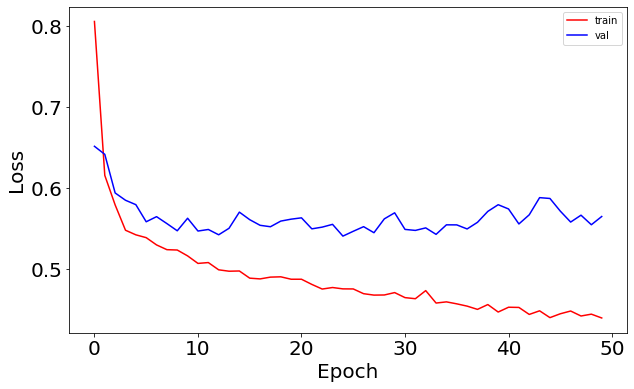

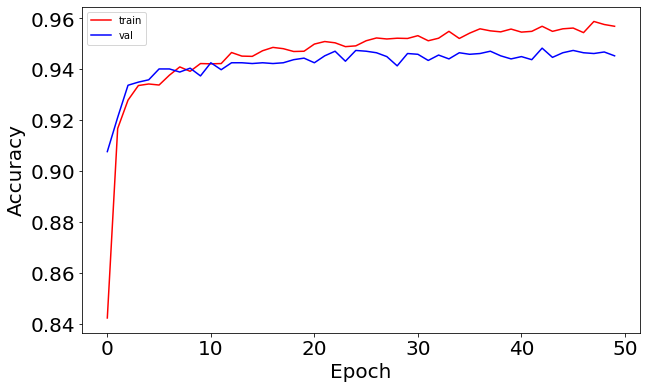

In [106]:
# http://localhost:8888/notebooks/DABC_hw/machine-learning-challenge/model_1.ipynb

# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [107]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               4000      
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 303       
Total params: 24,503
Trainable params: 24,503
Non-trainable params: 0
__________________________________________________

In [108]:
# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

## Quantifying the Model
We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [109]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3185338155628615, Accuracy: 0.8935926556587219


## Making Predictions with new data

We can use our trained model to make predictions using `model.predict`

In [110]:
import numpy as np
test = np.expand_dims(X_test[1], axis=0)
test.shape

(1, 39)

In [111]:
test = np.asarray(test).astype(np.float32)

In [112]:
prediction = model.predict_classes(test)
print(f"Predicted class: {prediction}")

Predicted class: [2]


In [113]:
label_encoder.inverse_transform(prediction)

array(['FALSE POSITIVE'], dtype=object)

In [114]:
# Make predictions
predictions = model.predict_classes(X_test_scaled)

In [115]:
predictions.shape

(1748,)

In [116]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                            target_names=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.75      0.79       427
     CONFIRMED       0.79      0.85      0.82       458
FALSE POSITIVE       0.98      0.99      0.99       863

      accuracy                           0.89      1748
     macro avg       0.87      0.86      0.86      1748
  weighted avg       0.89      0.89      0.89      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [42]:
# https://blogs.oracle.com/meena/simple-neural-network-model-using-keras-and-grid-search-hyperparameterstuning
# use KerasClassifier to create a tensor model that is searchable by scikit GridSearchSV

# Create the GridSearchCV model
gridModel = KerasClassifier(build_fn=create_model, batch_size=50, epochs=10, metrics='accuracy')


In [47]:
# Here are some parameters that can be varied
##def create_model (activation='relu', dropout_rate=0.2, hidden_units=100, 
##                  optimizer='adam', loss='categorical_crossentropy'):

## Potential parameters
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
momentum = [0.0,0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.2, 0.3]
dropout_rate=[0.0, 0.1, 0.2, 0.3, 0.5]
weight_contraint=[1,2,3,4,5]

hidden_nodes=[10,50,100,200]
init= ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 
       'he_normal', 'he_uniform']

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

epochs = [1, 10, 100, 200]
batch_size = [50, 100, 250, 500, 100]

In [48]:
param_grid = dict(epochs=epochs, batch_size=batch_size, dropout_rate=dropout_rate)
param_grid

{'epochs': [1, 10, 100, 200],
 'batch_size': [50, 100, 250, 500, 100],
 'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [49]:
grid = GridSearchCV(estimator=gridModel, param_grid=param_grid, n_jobs=-1)
                    #verbose=1, scoring='accuracy')

In [50]:
grid_result = grid.fit(X_train_scaled, y_train_categorical)

C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/200
5243/5243 [==============================] - 1s 124us/step - loss: 0.9731 - accuracy: 0.4990
Epoch 2/200
5243/5243 [==============================] - 0s 20us/step - loss: 0.7675 - accuracy: 0.6405
Epoch 3/200
5243/5243 [==============================] - 0s 21us/step - loss: 0.6244 - accuracy: 0.7282
Epoch 4/200
5243/5243 [==============================] - 0s 24us/step - loss: 0.5410 - accuracy: 0.7570
Epoch 5/200
5243/5243 [==============================] - 0s 23us/step - loss: 0.4981 - accuracy: 0.7774
Epoch 6/200
5243/5243 [==============================] - 0s 24us/step - loss: 0.4540 - accuracy: 0.7925
Epoch 7/200
5243/5243 [==============================] - 0s 23us/step - loss: 0.4501 - accuracy: 0.7860
Epoch 8/200
5243/5243 [==============================] - 0s 24us/step - loss: 0.4223 - accuracy: 0.8049
Epoch 9/200
5243/5243 [==============================] - 0s 21us/step - loss: 0.4203 - accuracy: 0.8062
Epoch 10/200
5243/5243 [==============================] - 0s 21

5243/5243 [==============================] - 0s 20us/step - loss: 0.2500 - accuracy: 0.8991
Epoch 77/200
5243/5243 [==============================] - 0s 20us/step - loss: 0.2583 - accuracy: 0.8961
Epoch 78/200
5243/5243 [==============================] - 0s 21us/step - loss: 0.2549 - accuracy: 0.8930
Epoch 79/200
5243/5243 [==============================] - 0s 21us/step - loss: 0.2533 - accuracy: 0.8957
Epoch 80/200
5243/5243 [==============================] - 0s 20us/step - loss: 0.2509 - accuracy: 0.8953
Epoch 81/200
5243/5243 [==============================] - 0s 21us/step - loss: 0.2520 - accuracy: 0.8930
Epoch 82/200
5243/5243 [==============================] - 0s 20us/step - loss: 0.2535 - accuracy: 0.8945
Epoch 83/200
5243/5243 [==============================] - 0s 20us/step - loss: 0.2524 - accuracy: 0.8962
Epoch 84/200
5243/5243 [==============================] - 0s 21us/step - loss: 0.2509 - accuracy: 0.8932
Epoch 85/200
5243/5243 [==============================] - 0s 21us/st

In [62]:
# Save the Grid Estimator from sklearn.externals import joblib
print(grid.best_estimator_)
joblib.dump(grid.best_estimator_, 'NN_grid_best_estimator.pkl', compress = 1)

C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['NN_grid_best_estimator.pkl']

In [ ]:
# Train the model with GridSearch

In [71]:
print(grid.best_params_)
print(grid.best_score_)

{'batch_size': 250, 'dropout_rate': 0.6, 'epochs': 200}
0.898340657992875


In [52]:
# Make predictions
predictions = grid.predict(X_test_scaled)

In [53]:
predictions.shape

(1748,)

In [54]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                            target_names=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.78      0.79       427
     CONFIRMED       0.81      0.83      0.82       458
FALSE POSITIVE       0.98      1.00      0.99       863

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



### Fit the Model using the Grid Estimators Best Parameters

In [73]:
dropout_rate = grid.best_params_['dropout_rate']
epochs = grid.best_params_['epochs']
batch_size = grid.best_params_['batch_size']

print(dropout_rate, epochs, batch_size)

0.6 200 250


In [74]:
best_NN_model = create_model(dropout_rate=dropout_rate)

In [95]:
model_history = best_NN_model.fit(
    X_train_scaled, y_train_categorical,
    epochs=epochs, 
    batch_size=batch_size,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

Train on 5243 samples, validate on 1748 samples
Epoch 1/200
 - 1s - loss: 0.9782 - accuracy: 0.4934 - val_loss: 0.8004 - val_accuracy: 0.6670
Epoch 2/200
 - 0s - loss: 0.7925 - accuracy: 0.6195 - val_loss: 0.6519 - val_accuracy: 0.7540
Epoch 3/200
 - 0s - loss: 0.6814 - accuracy: 0.6962 - val_loss: 0.5498 - val_accuracy: 0.7803
Epoch 4/200
 - 0s - loss: 0.5690 - accuracy: 0.7521 - val_loss: 0.4807 - val_accuracy: 0.7883
Epoch 5/200
 - 0s - loss: 0.5221 - accuracy: 0.7746 - val_loss: 0.4416 - val_accuracy: 0.7986
Epoch 6/200
 - 0s - loss: 0.4820 - accuracy: 0.7868 - val_loss: 0.4168 - val_accuracy: 0.8146
Epoch 7/200
 - 0s - loss: 0.4564 - accuracy: 0.7925 - val_loss: 0.4077 - val_accuracy: 0.8204
Epoch 8/200
 - 0s - loss: 0.4372 - accuracy: 0.8028 - val_loss: 0.4088 - val_accuracy: 0.8192
Epoch 9/200
 - 0s - loss: 0.4132 - accuracy: 0.8121 - val_loss: 0.3984 - val_accuracy: 0.8267
Epoch 10/200
 - 0s - loss: 0.4141 - accuracy: 0.8186 - val_loss: 0.3945 - val_accuracy: 0.8324
Epoch 11/20

Epoch 87/200
 - 0s - loss: 0.2494 - accuracy: 0.8955 - val_loss: 0.3083 - val_accuracy: 0.8982
Epoch 88/200
 - 0s - loss: 0.2440 - accuracy: 0.9039 - val_loss: 0.3244 - val_accuracy: 0.8953
Epoch 89/200
 - 0s - loss: 0.2471 - accuracy: 0.9012 - val_loss: 0.3287 - val_accuracy: 0.8930
Epoch 90/200
 - 0s - loss: 0.2521 - accuracy: 0.9025 - val_loss: 0.3213 - val_accuracy: 0.8987
Epoch 91/200
 - 0s - loss: 0.2451 - accuracy: 0.9004 - val_loss: 0.3250 - val_accuracy: 0.8959
Epoch 92/200
 - 0s - loss: 0.2498 - accuracy: 0.9002 - val_loss: 0.3229 - val_accuracy: 0.8959
Epoch 93/200
 - 0s - loss: 0.2450 - accuracy: 0.8999 - val_loss: 0.3167 - val_accuracy: 0.8976
Epoch 94/200
 - 0s - loss: 0.2454 - accuracy: 0.9025 - val_loss: 0.3150 - val_accuracy: 0.8993
Epoch 95/200
 - 0s - loss: 0.2429 - accuracy: 0.9035 - val_loss: 0.3153 - val_accuracy: 0.8993
Epoch 96/200
 - 0s - loss: 0.2462 - accuracy: 0.9006 - val_loss: 0.3155 - val_accuracy: 0.8970
Epoch 97/200
 - 0s - loss: 0.2457 - accuracy: 0.90

Epoch 173/200
 - 0s - loss: 0.2254 - accuracy: 0.9094 - val_loss: 0.3612 - val_accuracy: 0.8970
Epoch 174/200
 - 0s - loss: 0.2232 - accuracy: 0.9090 - val_loss: 0.3601 - val_accuracy: 0.9010
Epoch 175/200
 - 0s - loss: 0.2207 - accuracy: 0.9081 - val_loss: 0.3546 - val_accuracy: 0.8965
Epoch 176/200
 - 0s - loss: 0.2157 - accuracy: 0.9126 - val_loss: 0.3596 - val_accuracy: 0.8976
Epoch 177/200
 - 0s - loss: 0.2176 - accuracy: 0.9107 - val_loss: 0.3631 - val_accuracy: 0.8999
Epoch 178/200
 - 0s - loss: 0.2183 - accuracy: 0.9111 - val_loss: 0.3631 - val_accuracy: 0.8970
Epoch 179/200
 - 0s - loss: 0.2174 - accuracy: 0.9119 - val_loss: 0.3632 - val_accuracy: 0.9005
Epoch 180/200
 - 0s - loss: 0.2193 - accuracy: 0.9134 - val_loss: 0.3698 - val_accuracy: 0.8982
Epoch 181/200
 - 0s - loss: 0.2215 - accuracy: 0.9126 - val_loss: 0.3807 - val_accuracy: 0.8959
Epoch 182/200
 - 0s - loss: 0.2193 - accuracy: 0.9111 - val_loss: 0.3880 - val_accuracy: 0.8965
Epoch 183/200
 - 0s - loss: 0.2141 - acc

In [117]:
best_predicts = best_NN_model.predict_classes(X_test_scaled)

print(classification_report(encoded_y_test, best_predicts,
                            target_names=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.74      0.79       427
     CONFIRMED       0.79      0.86      0.82       458
FALSE POSITIVE       0.98      0.99      0.99       863

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



In [118]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3185338155628615, Accuracy: 0.8935926556587219


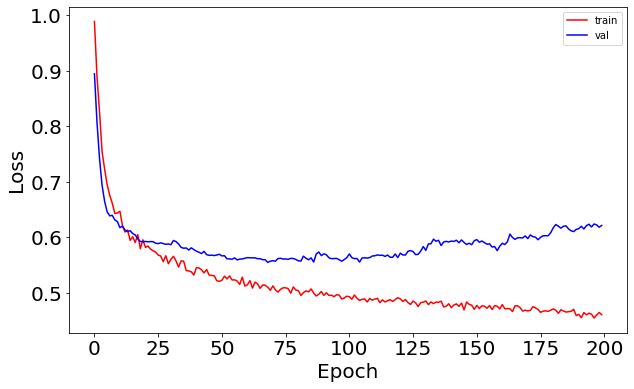

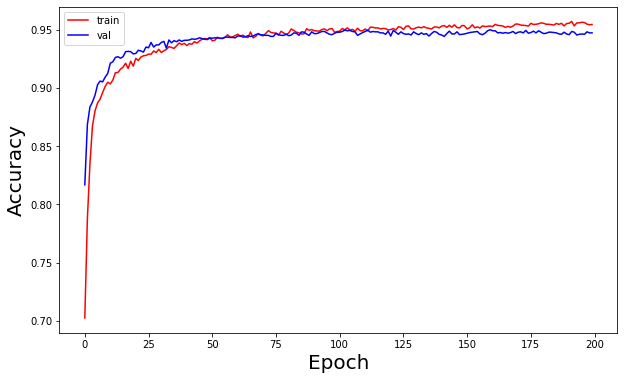

In [98]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()

# Save and Load the Trained Models
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [119]:
# Save the best grid estimatormodel
model.save("first_trained_NN.h5")
best_NN_model.save("best_grid_NN.h5")

In [120]:
from tensorflow.keras.models import load_model 
load_first_trained = load_model("firstModel_trained.h5")
load_best_grid = load_model("best_grid_NN.h5")

In [121]:
# Predict with both models
first_predicts = load_first_trained.predict_classes(X_test_scaled)
grid_predicts = load_best_grid.predict_classes(X_test_scaled)

#### My Original Neural Net

In [122]:
# score the models
print(classification_report(encoded_y_test, first_predicts,
                            target_names=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.93      0.94      0.94       427
     CONFIRMED       0.94      0.95      0.94       458
FALSE POSITIVE       1.00      0.99      0.99       863

      accuracy                           0.97      1748
     macro avg       0.96      0.96      0.96      1748
  weighted avg       0.97      0.97      0.97      1748



#### Best Grid Neural Net

In [123]:
print(classification_report(encoded_y_test, grid_predicts,
                            target_names=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.74      0.79       427
     CONFIRMED       0.79      0.86      0.82       458
FALSE POSITIVE       0.98      0.99      0.99       863

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



### COMMENTARY

My GridSerach did not do a great job of refining parameters for my Neural Net model.  Need to tune other parameters

I would go with my orginal first trained NN.